In [1]:
import pandas as pd

In [2]:
data_file = 'data/OnlineRetail.xlsx'
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M')
online = pd.read_excel(data_file, parse_dates=['InvoiceDate'])

In [3]:
online.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [4]:
"""
Cleanup dataset
Drop data containing NaN
"""
online.dropna(inplace=True)

In [5]:
online.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [6]:
"""
Helper function
for every date object we only extract year, month and hard coding date
e.g: 2012-01-10: A transaction was made on Jan 10 2012 comes under month of Jan 2012 falls under this month
so we ignore the date
This function can modified for different timeline grouping
"""
get_month = lambda x: pd.datetime(x.year, x.month, 1)

In [7]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

In [8]:
online.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12-01  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12-01  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01

In [11]:
"""
Dataset with month & year grouping ignoring the date
e.g InvoiceDate with date 2010-12-02 comes under the month of 2010-12 - which we call as InvoiceMonth
"""
online[online['InvoiceDate'] > '2010-12-02'].head()

InvoiceNo StockCode                      Description  Quantity  \
3108    536598     21421            PORCELAIN ROSE LARGE         12   
3109    536598     21422             PORCELAIN ROSE SMALL        16   
3110    536598     22178  VICTORIAN GLASS HANGING T-LIGHT        24   
3111    536598     22617       BAKING SET SPACEBOY DESIGN        24   
3112    536599     22968       ROSE COTTAGE KEEPSAKE BOX          8   

             InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  
3108 2010-12-02 07:48:00       1.25     13090.0  United Kingdom   2010-12-01  
3109 2010-12-02 07:48:00       0.85     13090.0  United Kingdom   2010-12-01  
3110 2010-12-02 07:48:00       1.25     13090.0  United Kingdom   2010-12-01  
3111 2010-12-02 07:48:00       4.25     13090.0  United Kingdom   2010-12-01  
3112 2010-12-02 07:49:00       8.50     15694.0  United Kingdom   2010-12-01

In [14]:
"""
Lets group the CustomerID's and extract InvoiceMonth
"""
grouping = online.groupby('CustomerID')['InvoiceMonth']

In [24]:
"""
Preview groupby dataset
In Preview: showing for each CustomerID counting the invoices
"""
grouping.count().head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceMonth, dtype: int64

In [26]:
"""
Validation for the above dataset
"""
online[online['CustomerID'] == 12346.0]

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   

              InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  
61619 2011-01-18 10:01:00       1.04     12346.0  United Kingdom   2011-01-01  
61624 2011-01-18 10:17:00       1.04     12346.0  United Kingdom   2011-01-01

In [28]:
"""
Using the above grouping: for each grouped CustomerID transform InvoiceMonth to select the min
InvoiceMonth.
Assign back the updated data into original dataframe as CohortMonth
Note: 
    unlike aggregate function transform output size is same as input size
    transform is an operation used in conjunction with groupby
"""
online['CohortMonth'] = grouping.transform('min')

In [30]:
"""
Preview dataset: after generating CohortMonth for grouped CustomerID
You can see CustomerID grouped with their corresponding CohortMonth assigned
"""
online.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   

  CohortMonth  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [32]:
"""
Preview dataset: showing example of Purchase made by a customer for a particular SKU,
InvoiceMonth is the month of Purchase, whereas CohortMonth is the min month of Purchase i.e his first purchase
customer had be in the platform(registered) to make the 1st transaction. - thats why we apply transform function to each
customer - for each row the min date is applied
"""
online[(online['CustomerID']==14286) & (online['StockCode']==22745)]

InvoiceNo StockCode                 Description  Quantity  \
152163    549577     22745  POPPY'S PLAYHOUSE BEDROOM          6   
416792    572558     22745  POPPY'S PLAYHOUSE BEDROOM          6   

               InvoiceDate  UnitPrice  CustomerID         Country  \
152163 2011-04-11 08:16:00        2.1     14286.0  United Kingdom   
416792 2011-10-25 08:26:00        2.1     14286.0  United Kingdom   

       InvoiceMonth CohortMonth  
152163   2011-04-01  2011-04-01  
416792   2011-10-01  2011-04-01

In [36]:
"""
Making case for the above dataset without filtering the SKU
"""
online[online['CustomerID']==14286]

InvoiceNo StockCode                          Description  Quantity  \
152050    549577     22491          PACK OF 12 COLOURED PENCILS        24   
152051    549577     22489       PACK OF 12 TRADITIONAL CRAYONS        24   
152052    549577    85017B           ENVELOPE 50 BLOSSOM IMAGES        12   
152053    549577     22582         PACK OF 6 SWEETIE GIFT BOXES         6   
152054    549577     22583         PACK OF 6 HANDBAG GIFT BOXES         6   
152055    549577     23232          WRAP VINTAGE PETALS  DESIGN        25   
152056    549577     23231                   WRAP DOILEY DESIGN        25   
152057    549577     23233                 WRAP POPPIES  DESIGN        25   
152058    549577     22585            PACK OF 6 BIRDY GIFT TAGS        12   
152059    549577     22584       PACK OF 6 PANNETONE GIFT BOXES         6   
152060    549577     22814                    CARD PARTY GAMES         12   
152061    549577     22714                 CARD BIRTHDAY COWBOY        12   
152062    549577     22025          RING OF ROSES BIRTHDAY CARD        12   
152063    549577     22024           RAINY LADIES BIRTHDAY CARD        12   
152064    549577     22028         PENNY FARTHING BIRTHDAY CARD        12   
152065    549577     22983                  CARD BILLBOARD FONT        12   
152066    549577     22026             BANQUET BIRTHDAY  CARD          12   
152067    549577     22715                     CARD WEDDING DAY        12   
152068    549577     22029               SPACEBOY BIRTHDAY CARD        12   
152069    549577     22027              TEA PARTY BIRTHDAY CARD        12   
152070    549577     21497            FANCY FONTS BIRTHDAY WRAP        25   
152071    549577     22048           BIRTHDAY BANQUET GIFT WRAP        25   
152072    549577     21500                  PINK POLKADOT WRAP         25   
152073    549577     21499                   BLUE POLKADOT WRAP        25   
152074    549577     21498                  RED RETROSPOT WRAP         25   
152075    549577    84247G             DECOUPAGE,GREETING CARD,        12   
152076    549577     21506           FANCY FONT BIRTHDAY CARD,         12   
152077    549577     21504                 SKULLS GREETING CARD        12   
152078    549577     21507            ELEPHANT, BIRTHDAY CARD,         12   
152079    549577     21509   COWBOYS AND INDIANS BIRTHDAY CARD         12   
...          ...       ...                                  ...       ...   
471778    576650     21917      SET 12 KIDS  WHITE CHALK STICKS        24   
471779    576650     21912             VINTAGE SNAKES & LADDERS         6   
471780    576650     20972   PINK CREAM FELT CRAFT TRINKET BOX         12   
471781    576650     20979        36 PENCILS TUBE RED RETROSPOT        16   
471782    576650     22732       3D VINTAGE CHRISTMAS STICKERS         18   
471783    576650     22731        3D CHRISTMAS STAMPS STICKERS         18   
471784    576650     23192  BUNDLE OF 3 ALPHABET EXERCISE BOOKS        48   
471785    576650     22748            POPPY'S PLAYHOUSE KITCHEN         6   
471786    576650     22746        POPPY'S PLAYHOUSE LIVINGROOM          6   
471787    576650     23177             TREASURE ISLAND BOOK BOX         8   
471788    576650     23176               ABC TREASURE BOOK BOX          8   
471789    576650     23194           GYMKHANA TREASURE BOOK BOX         8   
471790    576650     23193       BUFFALO BILL TREASURE BOOK BOX         8   
471791    576650     22992               REVOLVER WOODEN RULER         12   
471792    576650     22961               JAM MAKING SET PRINTED        12   
471793    576650     21210   SET OF 72 RETROSPOT PAPER  DOILIES        12   
471794    576650     22089        PAPER BUNTING VINTAGE PAISLEY         6   
471795    576650     22910    PAPER CHAIN KIT VINTAGE CHRISTMAS        24   
471796    576650     22733    3D TRADITIONAL CHRISTMAS STICKERS        18   
471797    576650     20982          12 PENCILS TALL TUBE SKULLS        12   
471

In [49]:
"""
Helper function: to break dates into int tuple
"""
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [50]:
"""
Using helper function above retrive the dates as integer Series
"""
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

In [59]:
"""
Preview the dataset & type of dataset
"""
print(f'Type is: {type(invoice_year)}')
invoice_year.head()

Type is: <class 'pandas.core.series.Series'>


0    2010
1    2010
2    2010
3    2010
4    2010
Name: InvoiceMonth, dtype: int64

In [60]:
"""
Calculate the differences in invoice_year(Series) & cohort_year(Series)
- This will give us the months and year between them
"""
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [67]:
"""
Preview the DataFrame Series years_diff
"""
years_diff[years_diff > 0].head()

42505    1
42506    1
42507    1
42508    1
42509    1
dtype: int64

In [73]:
"""
Using the above Dataframe Series, we calculate the CohortIndex i.e the Months
years_diff * 12 = total months
months_diff + 1 = as we want the starting month as 1 not as 0 for easier understanding
"""
online['CohortIndex'] = years_diff * 12 + months_diff + 1

In [72]:
"""
Preview dataset: after calculating CohortIndex
"""
online.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   

  CohortMonth  CohortIndex  
0  2010-12-01            1  
1  2010-12-01            1  
2  2010-12-01            1  
3  2010-12-01            1  
4  2010-12-01            1

In [75]:
"""
Preview dataset where CohortIndex > 2
"""
online[online['CohortIndex'] > 2].head()

InvoiceNo StockCode                        Description  Quantity  \
77628    542776     21671       RED SPOT CERAMIC DRAWER KNOB        48   
77629    542776     21668     RED STRIPE CERAMIC DRAWER KNOB        12   
77630    542776     21670      BLUE SPOT CERAMIC DRAWER KNOB        12   
77631    542776    17013D       ORIGAMI ROSE INCENSE IN TUBE        96   
77632    542776     17096  ASSORTED LAQUERED INCENSE HOLDERS        48   

              InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
77628 2011-02-01 08:23:00       1.25     15240.0  United Kingdom   2011-02-01   
77629 2011-02-01 08:23:00       1.25     15240.0  United Kingdom   2011-02-01   
77630 2011-02-01 08:23:00       1.25     15240.0  United Kingdom   2011-02-01   
77631 2011-02-01 08:23:00       0.42     15240.0  United Kingdom   2011-02-01   
77632 2011-02-01 08:23:00       0.21     15240.0  United Kingdom   2011-02-01   

      CohortMonth  CohortIndex  
77628  2010-12-01            3  
77629  2010-12-01            3  
77630  2010-12-01            3  
77631  2010-12-01            3  
77632  2010-12-01            3

In [76]:
"""
Lets group data by CohortMonth & CohortIndex
Note: unlike the last grouping we dont slice/extract the column - we group & create new dataframe with same data
"""
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [78]:
"""
Preview dataset: after grouping
"""
grouping.head()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
42481     539993     22386              JUMBO BAG PINK POLKADOT        10   
42482     539993     21499                   BLUE POLKADOT WRAP        25   
42483     539993     21498                  RED RETROSPOT WRAP         25   
42484     539993     22379             RECYCLING BAG RETROSPOT          5   
42485     539993     20718            RED RETROSPOT SHOPPER BAG        10   
42505     540001     21733     RED HANGING HEART T-LIGHT HOLDER        32   
42506     540001     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        24   
42507     540001     22060      LARGE CAKE STAND HANGING HEARTS         6   
42508     540001     22151            PLACE SETTING WHITE HEART        48   
42509     540001     22508             DOORSTOP RETROSPOT HEART        16   
77628     542776     21671         RED SPOT CERAMIC DRAWER KNOB        48   
77629     542776     21668       RED STRIPE CERAMIC DRAWER KNOB        12   
77630     542776     21670        BLUE SPOT CERAMIC DRAWER KNOB        12   
77631     542776    17013D         ORIGAMI ROSE INCENSE IN TUBE        96   
77632     542776     17096    ASSORTED LAQUERED INCENSE HOLDERS        48   
77701     542779     21121    SET/10 RED POLKADOT PARTY CANDLES        24   
77702     542779     21122   SET/10 PINK POLKADOT PARTY CANDLES        24   
77703     542779     21124   SET/10 BLUE POLKADOT PARTY CANDLES        24   
77704     542779     22858                  EASTER TIN KEEPSAKE        12   
77705     542779     22859             EASTER TIN BUNNY BOUQUET         6   
77741    C542781     21731        RED TOADSTOOL LED NIGHT LIGHT       -12   
77742    C542781     22634       CHILDS BREAKFAST SET SPACEBOY         -3   
77769     542786     22970                LONDON BUS COFFEE MUG         6   
77770     542786     22616           PACK OF 12 LONDON TISSUES         24   
77771     542786     22902               TOTE BAG I LOVE LONDON        12   
...          ...       ...                                  ...       ...   
516492    579916     23081        GREEN METAL BOX ARMY SUPPLIES        16   
516525    579927     22423             REGENCY CAKESTAND 3 TIER         4   
516526    579927     22698       PINK REGENCY TEACUP AND SAUCER         6   
516527    579927     22699     ROSES REGENCY TEACUP AND SAUCER          6   
516550   C579929     22768           FAMILY PHOTO FRAME CORNICE        -2   
516551   C579929    85034C          3 ROSE MORRIS BOXED CANDLES        -1   
516552   C579929    72807C  SET/3 VANILLA SCENTED CANDLE IN BOX        -1   
516553   C579929     22307     GOLD MUG BONE CHINA TREE OF LIFE        -1   
516554   C579929     72741                GRAND CHOCOLATECANDLE        -3   
516558   C579932     22768           FAMILY PHOTO FRAME CORNICE        -1   
516562    579936     21787                RAIN PONCHO RETROSPOT      1200   
516861    579990    82494L          WOODEN FRAME ANTIQUE WHITE         18   
516862    579990     23086           ZINC  STAR T-LIGHT HOLDER         16   
516863    579990     23118         PARISIENNE JEWELLERY DRAWER          6   
516864    579990     21340  CLASSIC METAL BIRDCAGE PLANT HOLDER         5   
516865    579990     84832     ZINC WILLIE WINKIE  CANDLE STICK        12   
516873    579991     22578   WOODEN STAR CHRISTMAS SCANDINAVIAN        24   
516874    579991     22595             GINGHAM HEART DECORATION        12   
516875    579991     21912             VINTAGE SNAKES & LADDERS         4   
517349    580054     22187     GREEN CHRISTMAS TREE CARD HOLDER         4   
517

In [79]:
"""
Now for each group(CohortMonth, CohortIndex) - we calculate the number of unique customers
i.e count the customers
"""
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [86]:
"""
Preview dataset: after calculating the cohort_data
From below you can see:
For CohortMonth 2010-12-01 & CohortIndex 1 there are 948 Customers
similarly for other data like:
For CohortMonth 2011-01-01 & CohortIndex 10 there are 146 Customers
"""
cohort_data.head(50)

CohortMonth  CohortIndex
2010-12-01   1              948
             2              362
             3              317
             4              367
             5              341
             6              376
             7              360
             8              336
             9              336
             10             374
             11             354
             12             474
             13             260
2011-01-01   1              421
             2              101
             3              119
             4              102
             5              138
             6              126
             7              110
             8              108
             9              131
             10             146
             11             155
             12              63
2011-02-01   1              380
             2               94
             3               73
             4              106
             5              102
             6 

In [87]:
"""
We reset_index of the dataframe
Note: cohort_data is a separate dataframe from online (online dataframe still exists)!
"""
cohort_data = cohort_data.reset_index()

In [88]:
"""
Preview dataset: after resetting the index
Note: CustomerID is actually the count of customers not the actual CustomerID
"""
cohort_data.head()

CohortMonth  CohortIndex  CustomerID
0  2010-12-01            1         948
1  2010-12-01            2         362
2  2010-12-01            3         317
3  2010-12-01            4         367
4  2010-12-01            5         341

In [89]:
"""
Now we'll create a Pivot Table for the above cohort_data
Where index(Row) is CohortMonth data
columns(Table columns) is CohortIndex
values is the CustomerID (Count)
"""
cohort_counts = cohort_data.pivot(
    index='CohortMonth',
    columns='CohortIndex',
    values='CustomerID'
)

In [91]:
"""
Preview dataset: after pivoting the cohort data
CohortIndex - months (timeline)
CohortMonth - Date of first purchase or aquisation
Note: we are assuming the first purchase as aquisation as user has to in the platform for to make the transaction
"""
cohort_counts.head()

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0  336.0   
2011-01-01   421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0  131.0   
2011-02-01   380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   98.0   
2011-03-01   440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0  127.0   
2011-04-01   299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   25.0   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12-01   374.0  354.0  474.0  260.0  
2011-01-01   146.0  155.0   63.0    NaN  
2011-02-01   119.0   35.0    NaN    NaN  
2011-03-01    39.0    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN

In [98]:
"""
Using the above data we'll calculate the Cohort Metrics
1. Cohort Size - 1st column i.e the total customer acquisation/entry
2. Retention - Dividing the 1st column values with next consecutive columns
    - This gives us the rate of retention like after aquisation how many customers transact with us after months
"""
cohort_sizes = cohort_counts.iloc[:, 0]

# passing the axis=0 to do the division along the index axis (CohortMonth)
# e.g:
# for 1st row = 362 / 948
# for 2nd row = 421 / 101
#
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [99]:
"""
Preview dataset: after calculating i.e dividing 1st column values to consecutive coluems for each row
"""
retention.head()

CohortIndex   1         2         3         4         5         6         7   \
CohortMonth                                                                    
2010-12-01   1.0  0.381857  0.334388  0.387131  0.359705  0.396624  0.379747   
2011-01-01   1.0  0.239905  0.282660  0.242280  0.327791  0.299287  0.261283   
2011-02-01   1.0  0.247368  0.192105  0.278947  0.268421  0.247368  0.255263   
2011-03-01   1.0  0.190909  0.254545  0.218182  0.231818  0.177273  0.263636   
2011-04-01   1.0  0.227425  0.220736  0.210702  0.207358  0.237458  0.230769   

CohortIndex        8         9         10        11        12        13  
CohortMonth                                                              
2010-12-01   0.354430  0.354430  0.394515  0.373418  0.500000  0.274262  
2011-01-01   0.256532  0.311164  0.346793  0.368171  0.149644       NaN  
2011-02-01   0.281579  0.257895  0.313158  0.092105       NaN       NaN  
2011-03-01   0.238636  0.288636  0.088636       NaN       NaN       NaN  
2011-04-01   0.260870  0.083612       NaN       NaN       NaN       NaN

In [100]:
"""
Update the dataset retention to percentage instead of absolute values
"""
retention.round(3) * 100

CohortIndex     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                
2010-12-01   100.0  38.2  33.4  38.7  36.0  39.7  38.0  35.4  35.4  39.5   
2011-01-01   100.0  24.0  28.3  24.2  32.8  29.9  26.1  25.7  31.1  34.7   
2011-02-01   100.0  24.7  19.2  27.9  26.8  24.7  25.5  28.2  25.8  31.3   
2011-03-01   100.0  19.1  25.5  21.8  23.2  17.7  26.4  23.9  28.9   8.9   
2011-04-01   100.0  22.7  22.1  21.1  20.7  23.7  23.1  26.1   8.4   NaN   
2011-05-01   100.0  23.7  17.2  17.2  21.5  24.4  26.5  10.4   NaN   NaN   
2011-06-01   100.0  20.9  18.7  27.2  24.7  33.6  10.2   NaN   NaN   NaN   
2011-07-01   100.0  20.9  20.4  23.0  27.2  11.5   NaN   NaN   NaN   NaN   
2011-08-01   100.0  25.1  25.1  25.1  13.8   NaN   NaN   NaN   NaN   NaN   
2011-09-01   100.0  29.9  32.6  12.1   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01   100.0  26.4  13.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01   100.0  13.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12    13  
CohortMonth                    
2010-12-01   37.3  50.0  27.4  
2011-01-01   36.8  15.0   NaN  
2011-02-01    9.2   NaN   NaN  
2011-03-01    NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN  
2011-11-01    NaN   NaN   NaN  
2011-12-01    NaN   NaN   NaN

In [106]:
"""
Above we are calculating Retention analysis which uses Dates of purchases
- We can also have other types of Cohort Analysis like Quantity, UnitPrice, etc
"""

# We'll do the same grouping like above but this time for UnitPrice

grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [107]:
"""
For the dataframe grouped by CohortMonth & CohortIndex, extract the Quantity and calculate the mean
- This will give us the average quantity bought by customer for that grouped Cohorts
"""
cohort_data = grouping['Quantity'].mean()

In [108]:
"""
Resetting the cohort_data index
"""
cohort_data = cohort_data.reset_index()

In [111]:
"""
Create a pivot table by CohortMonth(Rows) & CohortIndex(Columns), values as average of Quantity
"""
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

In [112]:
average_quantity.head()

CohortIndex         1          2          3          4          5          6   \
CohortMonth                                                                     
2010-12-01   11.037691  14.603253  14.982141  14.801090  12.943024  14.318095   
2011-01-01   10.015502  12.573579  12.343099  10.940531  12.234048  14.895373   
2011-02-01   10.830223  12.081317  18.563242  11.959050  11.117223  11.411479   
2011-03-01    9.762443   9.924222  12.207366   9.455425  13.579228  12.313412   
2011-04-01    9.753962  10.105226   9.420617  11.598922  11.488889   8.220785   

CohortIndex         7          8          9          10         11         12  \
CohortMonth                                                                     
2010-12-01   15.173387  14.759559  16.660455  16.691004  17.264954  12.823263   
2011-01-01   14.226042  14.385729  11.398390   9.883069   9.090436   9.541612   
2011-02-01   13.346939  12.381845  10.272146  11.945771  12.645977        NaN   
2011-03-01   13.162317  12.177130  10.517494   8.880203        NaN        NaN   
2011-04-01    9.680620   9.289391   7.290019        NaN        NaN        NaN   

CohortIndex         13  
CohortMonth             
2010-12-01   14.776623  
2011-01-01         NaN  
2011-02-01         NaN  
2011-03-01         NaN  
2011-04-01         NaN

In [114]:
average_quantity.round(2)

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   11.04  14.60  14.98  14.80  12.94  14.32  15.17  14.76  16.66   
2011-01-01   10.02  12.57  12.34  10.94  12.23  14.90  14.23  14.39  11.40   
2011-02-01   10.83  12.08  18.56  11.96  11.12  11.41  13.35  12.38  10.27   
2011-03-01    9.76   9.92  12.21   9.46  13.58  12.31  13.16  12.18  10.52   
2011-04-01    9.75  10.11   9.42  11.60  11.49   8.22   9.68   9.29   7.29   
2011-05-01   10.87   9.03  13.88  11.81  10.90   8.67  10.15   7.37    NaN   
2011-06-01   10.33  13.68  10.46  13.28  10.23   9.76   9.26    NaN    NaN   
2011-07-01    9.72  12.70   7.14   7.84   6.01   7.01    NaN    NaN    NaN   
2011-08-01    9.89   5.96   5.35   5.98   6.98    NaN    NaN    NaN    NaN   
2011-09-01   11.92   5.48   7.58   8.84    NaN    NaN    NaN    NaN    NaN   
2011-10-01    8.43   6.94   7.96    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01    8.68   9.30    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01   14.50    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12-01   16.69  17.26  12.82  14.78  
2011-01-01    9.88   9.09   9.54    NaN  
2011-02-01   11.95  12.65    NaN    NaN  
2011-03-01    8.88    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

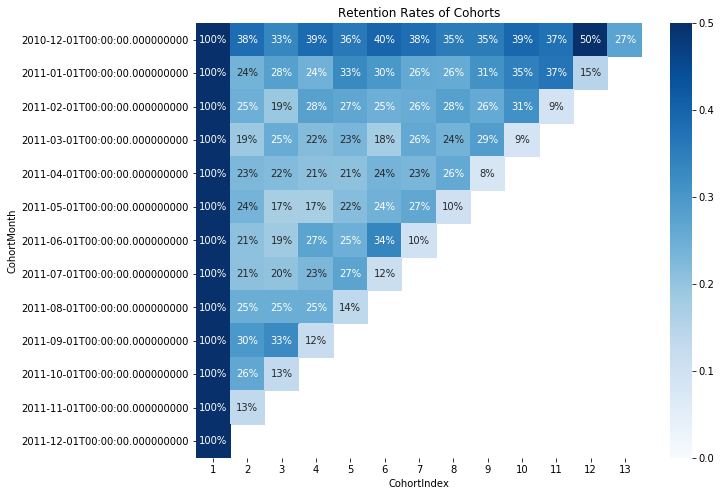

In [131]:
"""
Plotting data for retention
"""
plt.figure(figsize=(10, 8))
plt.title('Retention Rates of Cohorts')

sns.heatmap(
    data=retention,
    annot=True,
    fmt='.0%',
    vmin=0.0,
    vmax=0.5,
    cmap='Blues'
)

plt.show()

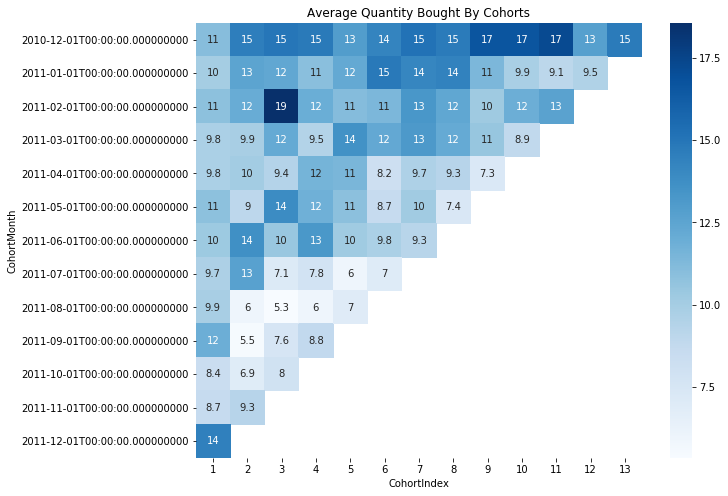

In [130]:
"""
Plotting data for average quantity
"""
plt.figure(figsize=(10, 8))
plt.title('Average Quantity Bought By Cohorts')

sns.heatmap(
    data=average_quantity,
    annot=True,
    cmap='Blues'
)

plt.show()